# Summarization with Transformers

![](https://i.imgur.com/7SXKckD.png)

Transfer Learning is the power of leveraging already trained models and tune \ adapt them to our own downstream tasks.

# Automated document summarization methodologies

- __Extractive techniques:__ These methods use mathematical and statistical concepts to extract a key subset of content from the original document such that this subset contains the core information of the entire document. This content could be words, phrases or even sentences. The end result from this approach is a short executive summary of a couple of lines which are taken or extracted from the original document. No new content is generated in this technique hence the name "extractive".


- __Abstractive techniques:__ These methods are more complex and sophisticated and leverage language semantics to create representations and also make use of natural language generation (NLG) techniques where the machine makes use of knowledge bases and semantic representations to generate text on its own and create summaries just like a human would write them. 

![](https://i.imgur.com/PlMTqig.png)

# Extractive Summarization with Transformers and TextRank

The idea is to extract document (sentence) embeddings using Transformers, find the pairwise sentence similarity scores and feed them into a PageRank model to compute the TextRank score.

## Understanding PageRank

![](https://i.imgur.com/2EqdEKJ.png)

![](https://i.imgur.com/1fCflBb.png)


## TextRank Summarization Workflow

![](https://i.imgur.com/C8cnEXO.png)


In [1]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 4.9 MB/s 
     |████████████████████████████████| 4.2 MB 17.5 MB/s 
     |████████████████████████████████| 1.2 MB 52.5 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
     |████████████████████████████████| 6.6 MB 56.7 MB/s 
     |████████████████████████████████| 596 kB 57.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=e79fe390c1f2b74bc49b41b456eea78a1cdb8adffdf4066f712c8e15def358ad
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
import nltk
from sentence_transformers import SentenceTransformer, util
import numpy as np

In [3]:
document = """
New York City (NYC), often called simply New York, is the most populous city in the United States. With an estimated 2019 population of 8,336,817 distributed over about 302.6 square miles (784 km2), New York City is also the most densely populated major city in the United States. Located at the southern tip of the U.S. state of New York, the city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass. With almost 20 million people in its metropolitan statistical area and approximately 23 million in its combined statistical area, it is one of the world's most populous megacities. New York City has been described as the cultural, financial, and media capital of the world, significantly influencing commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports. Home to the headquarters of the United Nations, New York is an important center for international diplomacy.
Situated on one of the world's largest natural harbors, New York City is composed of five boroughs, each of which is a county of the State of New York. The five boroughs—Brooklyn, Queens, Manhattan, the Bronx, and Staten Island—were consolidated into a single city in 1898. The city and its metropolitan area constitute the premier gateway for legal immigration to the United States. As many as 800 languages are spoken in New York, making it the most linguistically diverse city in the world. New York is home to more than 3.2 million residents born outside the United States, the largest foreign-born population of any city in the world as of 2016. As of 2019, the New York metropolitan area is estimated to produce a gross metropolitan product (GMP) of $2.0 trillion. If the New York metropolitan area were a sovereign state, it would have the eighth-largest economy in the world. New York is home to the highest number of billionaires of any city in the world.
New York City traces its origins to a trading post founded by colonists from the Dutch Republic in 1624 on Lower Manhattan; the post was named New Amsterdam in 1626. The city and its surroundings came under English control in 1664 and were renamed New York after King Charles II of England granted the lands to his brother, the Duke of York. The city was regained by the Dutch in July 1673 and was subsequently renamed New Orange for one year and three months; the city has been continuously named New York since November 1674. New York City was the capital of the United States from 1785 until 1790, and has been the largest U.S. city since 1790. The Statue of Liberty greeted millions of immigrants as they came to the U.S. by ship in the late 19th and early 20th centuries, and is a symbol of the U.S. and its ideals of liberty and peace. In the 21st century, New York has emerged as a global node of creativity, entrepreneurship, and environmental sustainability, and as a symbol of freedom and cultural diversity. In 2019, New York was voted the greatest city in the world per a survey of over 30,000 people from 48 cities worldwide, citing its cultural diversity.
Many districts and landmarks in New York City are well known, including three of the world's ten most visited tourist attractions in 2013. A record 62.8 million tourists visited New York City in 2017. Times Square is the brightly illuminated hub of the Broadway Theater District, one of the world's busiest pedestrian intersections, and a major center of the world's entertainment industry. Many of the city's landmarks, skyscrapers, and parks are known around the world. Manhattan's real estate market is among the most expensive in the world. Providing continuous 24/7 service and contributing to the nickname The City that Never Sleeps, the New York City Subway is the largest single-operator rapid transit system worldwide, with 472 rail stations. The city has over 120 colleges and universities, including Columbia University, New York University, Rockefeller University, and the City University of New York system, which is the largest urban public university system in the United States. Anchored by Wall Street in the Financial District of Lower Manhattan, New York City has been called both the world's leading financial center and the most financially powerful city in the world, and is home to the world's two largest stock exchanges by total market capitalization, the New York Stock Exchange and NASDAQ.
"""

In [4]:
document

"\nNew York City (NYC), often called simply New York, is the most populous city in the United States. With an estimated 2019 population of 8,336,817 distributed over about 302.6 square miles (784 km2), New York City is also the most densely populated major city in the United States. Located at the southern tip of the U.S. state of New York, the city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass. With almost 20 million people in its metropolitan statistical area and approximately 23 million in its combined statistical area, it is one of the world's most populous megacities. New York City has been described as the cultural, financial, and media capital of the world, significantly influencing commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports. Home to the headquarters of the United Nations, New York is an important center for international diplomacy.\nSituated on one of the w

In [5]:
# https://huggingface.co/microsoft/MiniLM-L12-H384-uncased
# MiniLM: Small and Fast Pre-trained Models for Language Understanding and Generation
# MiniLMv1-L12-H384-uncased: 12-layer, 384-hidden, 12-heads, 33M parameters, 2.7x faster than BERT-Base

embedder = SentenceTransformer('all-MiniLM-L12-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Get sentences of the document

In [8]:
#Split the document into sentences
sentences = nltk.sent_tokenize(document)
print("Num sentences:", len(sentences))

Num sentences: 29


In [9]:
sentences[:3]

['\nNew York City (NYC), often called simply New York, is the most populous city in the United States.',
 'With an estimated 2019 population of 8,336,817 distributed over about 302.6 square miles (784 km2), New York City is also the most densely populated major city in the United States.',
 'Located at the southern tip of the U.S. state of New York, the city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass.']

In [10]:
sentences = [sentence.strip('\n') for sentence in sentences]
sentences[:3]

['New York City (NYC), often called simply New York, is the most populous city in the United States.',
 'With an estimated 2019 population of 8,336,817 distributed over about 302.6 square miles (784 km2), New York City is also the most densely populated major city in the United States.',
 'Located at the southern tip of the U.S. state of New York, the city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass.']

## Compute Sentence Embeddings using Transformers (BERT)

In [11]:
#Compute the sentence embeddings
embeddings = embedder.encode(sentences, convert_to_tensor=True)

## Compute Pairwise Cosine Similarity

In [13]:
#Compute the pair-wise cosine similarities
cos_scores = util.cos_sim(embeddings, embeddings).cpu().numpy()

In [15]:
import pandas as pd
pd.DataFrame(cos_scores)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.000000,0.683589,0.672355,0.507693,0.576019,0.420033,0.556394,0.425363,0.483203,0.510753,...,0.485068,0.676393,0.451450,0.434858,0.268609,0.408196,0.487777,0.475560,0.469768,0.511966
1,0.683589,1.000000,0.540958,0.626216,0.421512,0.286935,0.474409,0.365224,0.406670,0.518302,...,0.365794,0.581785,0.386625,0.513844,0.310884,0.300820,0.376382,0.446747,0.426107,0.382014
2,0.672355,0.540958,1.000000,0.428605,0.563072,0.533176,0.550291,0.360297,0.458560,0.397422,...,0.511055,0.537716,0.402225,0.339774,0.388813,0.392421,0.441242,0.425586,0.406303,0.575386
3,0.507693,0.626216,0.428605,1.000000,0.345724,0.213504,0.247350,0.199427,0.372522,0.346058,...,0.266215,0.445271,0.332913,0.380894,0.360446,0.378935,0.312182,0.311655,0.307626,0.328724
4,0.576019,0.421512,0.563072,0.345724,1.000000,0.495270,0.469846,0.362402,0.423296,0.401911,...,0.685354,0.598273,0.541036,0.399813,0.328117,0.559200,0.422284,0.382925,0.402944,0.564816
5,0.420033,0.286935,0.533176,0.213504,0.495270,1.000000,0.425411,0.303398,0.313696,0.337498,...,0.457816,0.327714,0.274059,0.249991,0.232448,0.262252,0.286974,0.234384,0.374616,0.425191
6,0.556394,0.474409,0.550291,0.247350,0.469846,0.425411,1.000000,0.609790,0.272406,0.460675,...,0.411595,0.497964,0.404258,0.352181,0.179906,0.346286,0.352217,0.439371,0.419697,0.393465
7,0.425363,0.365224,0.360297,0.199427,0.362402,0.303398,0.609790,1.000000,0.219191,0.365637,...,0.347364,0.379928,0.266135,0.230457,0.174223,0.259425,0.256188,0.353692,0.368581,0.259243
8,0.483203,0.406670,0.458560,0.372522,0.423296,0.313696,0.272406,0.219191,1.000000,0.256647,...,0.382787,0.384887,0.285326,0.281263,0.302442,0.337594,0.272272,0.320933,0.296287,0.311653
9,0.510753,0.518302,0.397422,0.346058,0.401911,0.337498,0.460675,0.365637,0.256647,1.000000,...,0.387918,0.573942,0.367964,0.437215,0.166486,0.284765,0.330590,0.397649,0.447351,0.277792


## TextRank to get most important sentences

In [17]:
import networkx

similarity_graph = networkx.from_numpy_array(cos_scores)
similarity_graph

In [19]:
similarity_graph.remove_edges_from(networkx.selfloop_edges(similarity_graph))

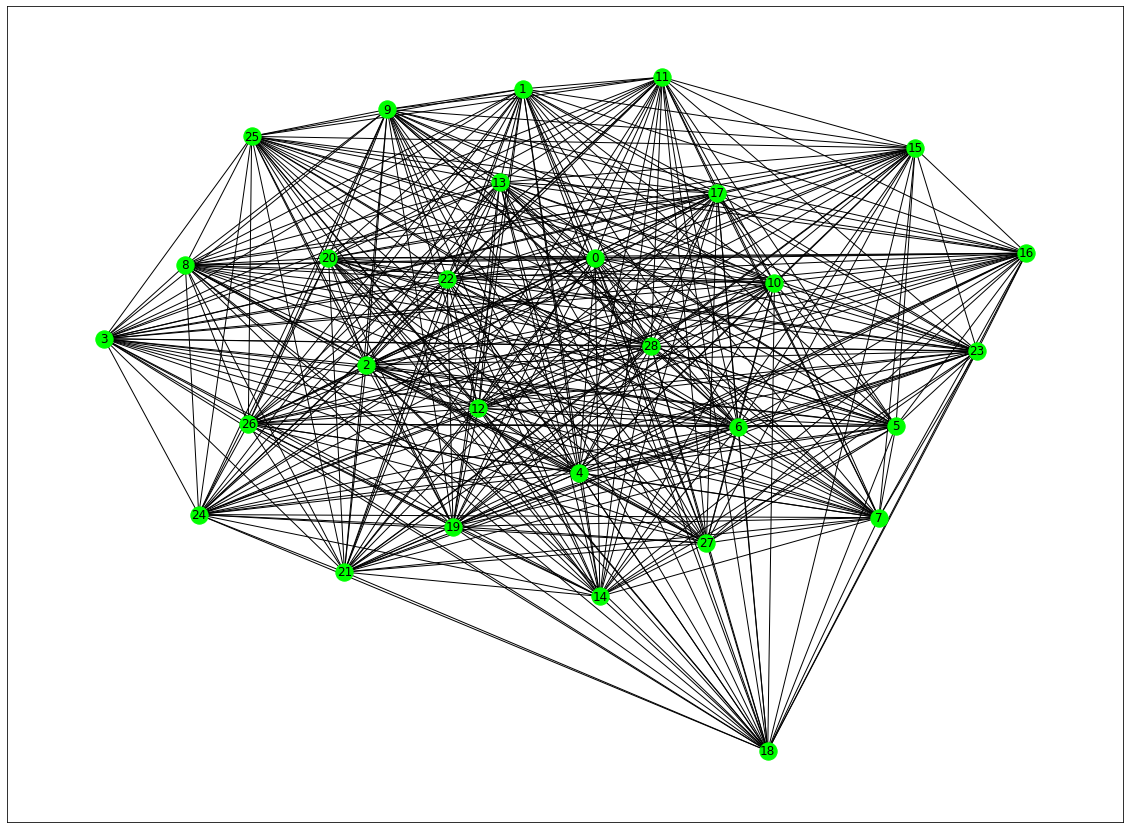

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 15))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [21]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:10]

[(0.04404883605416097, 0),
 (0.04237067845405319, 20),
 (0.041593951714059524, 4),
 (0.04134349502500236, 2),
 (0.040949543988206154, 17),
 (0.03968195125857828, 10),
 (0.03903304349317203, 13),
 (0.03887475916295398, 1),
 (0.03828393627175882, 19),
 (0.03796785649408061, 6)]

## Generate Summary

In [22]:
num_sentences = 5
top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort() 

In [23]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

New York City (NYC), often called simply New York, is the most populous city in the United States.
Located at the southern tip of the U.S. state of New York, the city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass.
New York City has been described as the cultural, financial, and media capital of the world, significantly influencing commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports.
New York City was the capital of the United States from 1785 until 1790, and has been the largest U.S. city since 1790.
In 2019, New York was voted the greatest city in the world per a survey of over 30,000 people from 48 cities worldwide, citing its cultural diversity.


# Abstractive Summarization by Fine-tuning Transformers

In this section we’ll take a look at how Transformer models can be used to condense long documents into summaries, a task known as abstractive text summarization. 

This is one of the most challenging NLP tasks as it requires a range of abilities, such as understanding long passages and generating coherent text that captures the main topics in a document. 

However, when done well, text summarization is a powerful tool that can speed up various business processes by relieving the burden of domain experts to read long documents in detail.

Remember this is a sequence to sequence problem and requires past documents with the large and short (summary) form to make the model learn enough patterns to take in a new large document in the future and summarize it



## Install Relevant Libraries



In [1]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 4.2 MB/s 
     |████████████████████████████████| 1.1 MB 91.0 MB/s 
     |████████████████████████████████| 212 kB 89.1 MB/s 
     |████████████████████████████████| 140 kB 91.6 MB/s 
     |████████████████████████████████| 86 kB 6.5 MB/s 
     |████████████████████████████████| 596 kB 62.8 MB/s 
     |████████████████████████████████| 127 kB 92.1 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
     |████████████████████████████████| 144 kB 58.5 MB/s 
     |████████████████████████████████| 271 kB 97.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's depen

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 4.3 MB/s 
     |████████████████████████████████| 6.6 MB 76.3 MB/s 


You will be leveraging 🤗 Transformers and 🤗 Datasets as well as other dependencies

## Load Dataset

Here we load The CNN / DailyMail Dataset is an English-language dataset containing just over 300k unique news articles as written by journalists at CNN and the Daily Mail. The current version supports both extractive and abstractive summarization, though the original version was created for machine reading and comprehension and abstractive question answering.

You can find the dataset in [HuggingFace Datasets](https://huggingface.co/datasets/cnn_dailymail)

For each instance, there is a string for the article, a string for the highlights, and a string for the id.

![](https://i.imgur.com/rhRwLI1.png)

In [1]:
from datasets import load_dataset, load_metric

cnn_data = load_dataset("cnn_dailymail", '3.0.0')

Reusing dataset cnn_dailymail (/root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de)


  0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
cnn_data.keys()

dict_keys(['train', 'validation', 'test'])

In [3]:
cnn_data['train'][:2]

{'article': ['LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office cha

Given infrastructure constraints we subset our dataset and limit training on only 10000 records.

In [4]:
cnn_data['train'] = cnn_data['train'].shuffle(seed=42).select(range(10000))
cnn_data['validation'] = cnn_data['validation'].shuffle(seed=42).select(range(2000))
cnn_data['test'] = cnn_data['test'].shuffle(seed=42).select(range(2000))

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de/cache-7d0683495a29c6ed.arrow
Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de/cache-2670a4089b7d24d3.arrow
Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de/cache-078f5e86fe5e9f48.arrow


The `dataset` object itself is [`DatasetDict`](https://huggingface.co/docs/datasets/package_reference/main_classes.html#datasetdict), which contains one key for the training, validation and test set:

In [5]:
cnn_data

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 2000
    })
})

To access an actual element, you need to select a split first, then give an index:

In [6]:
cnn_data["train"][0]

{'article': "By . Anthony Bond . PUBLISHED: . 07:03 EST, 2 March 2013 . | . UPDATED: . 08:07 EST, 2 March 2013 . Three members of the same family who died in a static caravan from carbon monoxide poisoning would have been unconscious 'within minutes', investigators said today. The bodies of married couple John and Audrey Cook were discovered alongside their daughter, Maureen, at the mobile home they shared on Tremarle Home Park in Camborne, west Cornwall. The inquests have now opened into the deaths last Saturday, with investigators saying the three died along with the family's pet dog, of carbon monoxide poisoning from a cooker. Tragic: The inquests have opened into the deaths of three members of the same family who were found in their static caravan last weekend. John and Audrey Cook are pictured . Awful: The family died following carbon monoxide poisoning at this caravan at the Tremarle Home Park in Camborne, Cornwall . It is also believed there was no working carbon monoxide detect

To get a sense of what the data looks like, the following function will show some examples picked randomly in the dataset.

In [7]:
import datasets
import random
import pandas as pd
from IPython.display import display, HTML


def show_random_elements(dataset, num_examples=5):
    assert num_examples <= len(
        dataset
    ), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset) - 1)
        while pick in picks:
            pick = random.randint(0, len(dataset) - 1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, datasets.ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))

In [8]:
show_random_elements(cnn_data["train"])

We will use the [🤗 Datasets](https://github.com/huggingface/datasets) library to download the metric we need to use for evaluation (to compare our model to the benchmark). This can be easily done with the function `load_metric`.  

In [9]:
!pip install rouge_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
metric = load_metric("rouge")
metric

Metric(name: "rouge", features: {'predictions': Value(dtype='string', id='sequence'), 'references': Value(dtype='string', id='sequence')}, usage: """
Calculates average rouge scores for a list of hypotheses and references
Args:
    predictions: list of predictions to score. Each prediction
        should be a string with tokens separated by spaces.
    references: list of reference for each prediction. Each
        reference should be a string with tokens separated by spaces.
    rouge_types: A list of rouge types to calculate.
        Valid names:
        `"rouge{n}"` (e.g. `"rouge1"`, `"rouge2"`) where: {n} is the n-gram based scoring,
        `"rougeL"`: Longest common subsequence based scoring.
        `"rougeLSum"`: rougeLsum splits text using `"
"`.
        See details in https://github.com/huggingface/datasets/issues/617
    use_stemmer: Bool indicating whether Porter stemmer should be used to strip word suffixes.
    use_aggregator: Return aggregates if this is set to True
Retu

The metric is an instance of [`datasets.Metric`](https://huggingface.co/docs/datasets/package_reference/main_classes.html#datasets.Metric):

You can call its `compute` method with your predictions and labels, which need to be list of decoded strings:

For summarization, one of the most commonly used metrics is the ROUGE score (short for Recall-Oriented Understudy for Gisting Evaluation). 

The basic idea behind this metric is to compare a generated summary against a set of reference summaries that are typically created by humans. 

To make this more precise, suppose we want to compare the following two summaries:

```
generated_summary = "I absolutely loved reading the Hunger Games"
reference_summary = "I loved reading the Hunger Games"
```

One way to compare them could be to count the number of overlapping words, which in this case would be 6. 

However, this is a bit crude, so instead ROUGE is based on computing the precision and recall scores for the overlap.

For ROUGE, recall measures how much of the reference summary is captured by the generated one. If we are just comparing words, recall can be calculated according to the following formula:

![](https://i.imgur.com/iYgPhYB.png)

For our simple example above, this formula gives a perfect recall of 6/6 = 1; i.e., all the words in the reference summary have been produced by the model. 


This may sound great, but imagine if our generated summary had been “I really really loved reading the Hunger Games all night”. This would also have perfect recall, but is arguably a worse summary since it is verbose. 

To deal with these scenarios we also compute the precision, which in the ROUGE context measures how much of the generated summary was relevant:

![](https://i.imgur.com/4aadAXM.png)
​
 

Applying this to our verbose summary gives a precision of 6/10 = 0.6, which is considerably worse than the precision of 6/7 = 0.86 obtained by our shorter one. 

In practice, both precision and recall are usually computed, and then the F1-score (the harmonic mean of precision and recall) is reported.


In [53]:
generated_summary = "I absolutely loved reading the Hunger Games"
reference_summary = "I loved reading the Hunger Games"
scores = metric.compute(
    predictions=[generated_summary], references=[reference_summary]
)
scores

{'rouge1': AggregateScore(low=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923), mid=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923), high=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923)),
 'rouge2': AggregateScore(low=Score(precision=0.6666666666666666, recall=0.8, fmeasure=0.7272727272727272), mid=Score(precision=0.6666666666666666, recall=0.8, fmeasure=0.7272727272727272), high=Score(precision=0.6666666666666666, recall=0.8, fmeasure=0.7272727272727272)),
 'rougeL': AggregateScore(low=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923), mid=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923), high=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923)),
 'rougeLsum': AggregateScore(low=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923), mid=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.92307692307

🤗 Datasets actually computes confidence intervals for precision, recall, and F1-score; these are the low, mid, and high attributes you can see here. 

Moreover, 🤗 Datasets computes a variety of ROUGE scores which are based on different types of text granularity when comparing the generated and reference summaries. 

- rouge1 is the overlap of unigrams — this is just a fancy way of saying the overlap of words

- rouge2 measures the overlap between bigrams (think the overlap of pairs of words)

- rougeL and rougeLsum measure the longest matching sequences of words by looking for the longest common substrings in the generated and reference summaries

- The “sum” in rougeLsum refers to the fact that this metric is computed over a whole summary, while rougeL is computed as the average over individual sentences

## Preprocessing the data

Before we can feed those texts to our model, we need to preprocess them. This is done by a 🤗 Transformers `Tokenizer` which will (as the name indicates) tokenize the inputs (including converting the tokens to their corresponding IDs in the pretrained vocabulary) and put it in a format the model expects, as well as generate the other inputs that the model requires.

To do all of this, we instantiate our tokenizer with the `AutoTokenizer.from_pretrained` method, which will ensure:

- we get a tokenizer that corresponds to the model architecture we want to use,
- we download the vocabulary used when pretraining this specific checkpoint.

That vocabulary will be cached, so it's not downloaded again the next time we run the cell.

This notebook is built to run  with any model checkpoint from the [Model Hub](https://huggingface.co/models) as long as that model has a sequence-to-sequence version in the Transformers library. 

Here we picked the [`t5-small`](https://huggingface.co/t5-small) checkpoint.

![](https://i.imgur.com/MFE2vfu.png)

T5 can be used for a variety of tasks and we will fine-tune it for summarization.

In [12]:
from transformers import AutoTokenizer

model_checkpoint = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5_fast.py:161: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


By default, the call above will use one of the fast tokenizers (backed by Rust) from the 🤗 Tokenizers library.

You can directly call this tokenizer on one sentence or a pair of sentences:

In [13]:
tokenizer("Hello, this is a sentence!")

{'input_ids': [8774, 6, 48, 19, 3, 9, 7142, 55, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

To prepare the targets for our model, we need to tokenize them inside the `as_target_tokenizer` context manager. This will make sure the tokenizer uses the special tokens corresponding to the targets:

In [14]:
with tokenizer.as_target_tokenizer():
    print(tokenizer(["Hello, this is a sentence!", "This is another sentence."]))

{'input_ids': [[8774, 6, 48, 19, 3, 9, 7142, 55, 1], [100, 19, 430, 7142, 5, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}


If you are using the T5 model, we have to prefix the inputs with "summarize:" (the model can also translate and it needs the prefix to know which task it has to perform).

In [15]:
prefix = "summarize: "

We can then write the function that will preprocess our samples. We just feed them to the `tokenizer` with the argument `truncation=True`. 

This will ensure that an input longer that what the model selected can handle will be truncated to the maximum length accepted by the model. 

The padding will be dealt with later on (in a data collator) so we pad examples to the longest length in the batch and not the whole dataset.

In [16]:
max_input_length = 1024
max_target_length = 128

In [17]:
def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["article"]]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            examples["highlights"], max_length=max_target_length, truncation=True
        )

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

This function works with one or several examples. In the case of several examples, the tokenizer will return a list of lists for each key:

In [18]:
preprocess_function(cnn_data["train"][:2])

{'input_ids': [[21603, 10, 938, 3, 5, 11016, 12528, 3, 5, 3, 10744, 8775, 20619, 2326, 10, 3, 5, 10668, 10, 4928, 3, 6038, 6, 204, 1332, 2038, 3, 5, 1820, 3, 5, 3, 6880, 4296, 11430, 10, 3, 5, 12046, 10, 4560, 3, 6038, 6, 204, 1332, 2038, 3, 5, 5245, 724, 13, 8, 337, 384, 113, 3977, 16, 3, 9, 14491, 22133, 45, 4146, 1911, 6778, 15, 14566, 53, 133, 43, 118, 25429, 3, 31, 4065, 77, 676, 31, 6, 16273, 7, 243, 469, 5, 37, 5678, 13, 4464, 1158, 1079, 11, 31423, 6176, 130, 3883, 5815, 70, 3062, 6, 7758, 60, 35, 6, 44, 8, 1156, 234, 79, 2471, 30, 4691, 1635, 109, 1210, 1061, 16, 5184, 12940, 6, 4653, 26334, 5, 37, 16, 10952, 7, 43, 230, 2946, 139, 8, 14319, 336, 1856, 6, 28, 16273, 7, 2145, 8, 386, 3977, 590, 28, 8, 384, 31, 7, 3947, 1782, 6, 13, 4146, 1911, 6778, 15, 14566, 53, 45, 3, 9, 21859, 5, 21902, 447, 10, 37, 16, 10952, 7, 43, 2946, 139, 8, 14319, 13, 386, 724, 13, 8, 337, 384, 113, 130, 435, 16, 70, 14491, 22133, 336, 1851, 5, 1079, 11, 31423, 6176, 33, 3, 22665, 3, 5, 71, 210, 1329

To apply this function on all the pairs of sentences in our dataset, we just use the `map` method of our `dataset` object we created earlier. 

This will apply the function on all the elements of all the splits in `dataset`, so our training, validation and testing data will be preprocessed in one single command.

In [19]:
tokenized_datasets = cnn_data.map(preprocess_function, batched=True)

Parameter 'function'=<function preprocess_function at 0x7efc58ed3f80> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/10 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

Even better, the results are automatically cached by the 🤗 Datasets library to avoid spending time on this step the next time you run your notebook. 

The 🤗 Datasets library is normally smart enough to detect when the function you pass to map has changed (and thus requires to not use the cache data). 

For instance, it will properly detect if you change the task in the first cell and rerun the notebook.

## Fine-tuning the Transformer Model 

Now that our data is ready, we can download the pretrained model and fine-tune it. 

Since our task is of the sequence-to-sequence kind, we use the `AutoModelForSeq2SeqLM` class. 

Like with the tokenizer, the `from_pretrained` method will download and cache the model for us.

In [20]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

To instantiate a `Seq2SeqTrainer`, we will need to define three more things. 

The most important is the [`Seq2SeqTrainingArguments`](https://huggingface.co/transformers/main_classes/trainer.html#transformers.Seq2SeqTrainingArguments), which is a class that contains all the attributes to customize the training. 

It requires one folder name, which will be used to save the checkpoints of the model, and all other arguments are optional:

In [26]:
batch_size = 16
model_name = model_checkpoint.split("/")[-1]

args = Seq2SeqTrainingArguments(
    f"{model_name}-finetuned-xsum",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    predict_with_generate=True,
    fp16=True,
    push_to_hub=False,
)

Here,

- we set the evaluation to be done at the end of each epoch
- tweak the learning rate
- use the `batch_size` defined at the top of the cell 
- customize the weight decay

Since the `Seq2SeqTrainer` will save the model regularly and our dataset is quite large, we tell it to make three saves maximum.

Lastly, we use the `predict_with_generate` option (to properly generate summaries) and activate mixed precision training (to go a bit faster).

Then, we need a special kind of data collator, which will not only pad the inputs to the maximum length in the batch, but also the labels:

In [27]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [28]:
import numpy as np
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

The last thing to define for our `Seq2SeqTrainer` is how to compute the metrics from the predictions. 

We need to define a function for this, which will just use the `metric` we loaded earlier, and we have to do a bit of pre-processing to decode the predictions into texts:

In [30]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them.
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    
    # Rouge expects a newline after each sentence
    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]
    
    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    # Extract a few results
    result = {key: value.mid.fmeasure * 100 for key, value in result.items()}
    
    # Add mean generated length
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)
    
    return {k: round(v, 4) for k, v in result.items()}

Then we just need to pass all of this along with our datasets to the `Seq2SeqTrainer`:

In [31]:
trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

Using amp half precision backend


We can now finetune our model by just calling the `train` method:

In [32]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `T5ForConditionalGeneration.forward` and have been ignored: id, article, highlights. If id, article, highlights are not expected by `T5ForConditionalGeneration.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 10000
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1875


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,2.005200,1.718419,24.255400,11.704900,20.072200,22.802600,19.000000
2,1.928300,1.707468,24.293500,11.688900,20.058700,22.842000,19.000000
3,1.905800,1.704664,24.319600,11.717700,20.065500,22.854200,19.000000


Saving model checkpoint to t5-small-finetuned-xsum/checkpoint-500
Configuration saved in t5-small-finetuned-xsum/checkpoint-500/config.json
Model weights saved in t5-small-finetuned-xsum/checkpoint-500/pytorch_model.bin
tokenizer config file saved in t5-small-finetuned-xsum/checkpoint-500/tokenizer_config.json
Special tokens file saved in t5-small-finetuned-xsum/checkpoint-500/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `T5ForConditionalGeneration.forward` and have been ignored: id, article, highlights. If id, article, highlights are not expected by `T5ForConditionalGeneration.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 16
Saving model checkpoint to t5-small-finetuned-xsum/checkpoint-1000
Configuration saved in t5-small-finetuned-xsum/checkpoint-1000/config.json
Model weights saved in t5-small-finetuned-xsum/checkpoint-1000/pytorch_model.bin
tokenizer co

TrainOutput(global_step=1875, training_loss=1.9374664388020832, metrics={'train_runtime': 1861.9354, 'train_samples_per_second': 16.112, 'train_steps_per_second': 1.007, 'total_flos': 8120055539171328.0, 'train_loss': 1.9374664388020832, 'epoch': 3.0})

# Using your fine-tuned model for Summarization

Once you’ve fine-tuned the model you can use it with a pipeline object, for inference as follows:

In [33]:
from transformers import pipeline

In [34]:
model.to('cpu')

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseReluDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Dro

In [38]:
summarize = pipeline(task='summarization', model=model, tokenizer=tokenizer)

In [48]:
document = """New York City (NYC), often called simply New York, is the most populous city in the United States. With an estimated 2019 population of 8,336,817 distributed over about 302.6 square miles (784 km2), New York City is also the most densely populated major city in the United States. Located at the southern tip of the U.S. state of New York, the city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass. With almost 20 million people in its metropolitan statistical area and approximately 23 million in its combined statistical area, it is one of the world's most populous megacities. New York City has been described as the cultural, financial, and media capital of the world, significantly influencing commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports. Home to the headquarters of the United Nations, New York is an important center for international diplomacy.
Situated on one of the world's largest natural harbors, New York City is composed of five boroughs, each of which is a county of the State of New York. The five boroughs—Brooklyn, Queens, Manhattan, the Bronx, and Staten Island—were consolidated into a single city in 1898. The city and its metropolitan area constitute the premier gateway for legal immigration to the United States. As many as 800 languages are spoken in New York, making it the most linguistically diverse city in the world. New York is home to more than 3.2 million residents born outside the United States, the largest foreign-born population of any city in the world as of 2016. As of 2019, the New York metropolitan area is estimated to produce a gross metropolitan product (GMP) of $2.0 trillion. If the New York metropolitan area were a sovereign state, it would have the eighth-largest economy in the world. New York is home to the highest number of billionaires of any city in the world.
New York City traces its origins to a trading post founded by colonists from the Dutch Republic in 1624 on Lower Manhattan; the post was named New Amsterdam in 1626. The city and its surroundings came under English control in 1664 and were renamed New York after King Charles II of England granted the lands to his brother, the Duke of York. The city was regained by the Dutch in July 1673 and was subsequently renamed New Orange for one year and three months; the city has been continuously named New York since November 1674. New York City was the capital of the United States from 1785 until 1790, and has been the largest U.S. city since 1790. The Statue of Liberty greeted millions of immigrants as they came to the U.S. by ship in the late 19th and early 20th centuries, and is a symbol of the U.S. and its ideals of liberty and peace. In the 21st century, New York has emerged as a global node of creativity, entrepreneurship, and environmental sustainability, and as a symbol of freedom and cultural diversity. In 2019, New York was voted the greatest city in the world per a survey of over 30,000 people from 48 cities worldwide, citing its cultural diversity.
Many districts and landmarks in New York City are well known, including three of the world's ten most visited tourist attractions in 2013. A record 62.8 million tourists visited New York City in 2017. Times Square is the brightly illuminated hub of the Broadway Theater District, one of the world's busiest pedestrian intersections, and a major center of the world's entertainment industry. Many of the city's landmarks, skyscrapers, and parks are known around the world. Manhattan's real estate market is among the most expensive in the world. Providing continuous 24/7 service and contributing to the nickname The City that Never Sleeps, the New York City Subway is the largest single-operator rapid transit system worldwide, with 472 rail stations. The city has over 120 colleges and universities, including Columbia University, New York University, Rockefeller University, and the City University of New York system, which is the largest urban public university system in the United States. Anchored by Wall Street in the Financial District of Lower Manhattan, New York City has been called both the world's leading financial center and the most financially powerful city in the world, and is home to the world's two largest stock exchanges by total market capitalization, the New York Stock Exchange and NASDAQ."""

In [49]:
document

"New York City (NYC), often called simply New York, is the most populous city in the United States. With an estimated 2019 population of 8,336,817 distributed over about 302.6 square miles (784 km2), New York City is also the most densely populated major city in the United States. Located at the southern tip of the U.S. state of New York, the city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass. With almost 20 million people in its metropolitan statistical area and approximately 23 million in its combined statistical area, it is one of the world's most populous megacities. New York City has been described as the cultural, financial, and media capital of the world, significantly influencing commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports. Home to the headquarters of the United Nations, New York is an important center for international diplomacy.\nSituated on one of the wor

In [50]:
summary = summarize(document)[0]['summary_text']

In [51]:
print('\n'.join(nltk.sent_tokenize(summary)))

New York City is the largest metropolitan area in the world by urban landmass .
With almost 20 million people in its metropolitan statistical area and approximately 23 million in its combined statistical area, it is one of the world's most populous megacities .
The city and its metropolitan area constitute the premier gateway for legal immigration to the United States .


We can feed some examples from the test set (which the model has not seen) to our pipeline to get a feel for the quality of the summaries. 

In [52]:
for item in cnn_data['test'].shuffle(seed=42).select(range(10)):
  print('Acutal Headline:-\n', item['highlights'])
  print()
  summary = summarize(item['article'])[0]['summary_text']
  print('Summarized Headline:-\n', '\n'.join(nltk.sent_tokenize(summary)))
  print('\n')

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de/cache-624ef0507d24c600.arrow


Acutal Headline:-
 Battle between lenders has intensified recently, causing rates to plummet .
HSBC have now announced 1.99% interest deal on a five-year fix mortgage .
Offer expected to spark flood of rate cuts by banks and building societies .
Experts have described cheapest deal ever of its kind as 'astonishing'

Summarized Headline:-
 The battle between lenders has intensified in recent months, plunging home loan rates to their lowest in history .
But the mortgage wars will erupt again next week after HSBC announced a 1.99 per cent interest rate on a five-year fix .
Experts said it was the cheapest ever deal of its kind and described the move as ‘astonishing’ .


Acutal Headline:-
 BBC's Back In Time For Dinner claims that grubs are the future of food .
The Robshaw family dig into cricket tacos, worm tarts and insect burgers .
Meat will become scarce or more expensive as demand for it grows .
Insects are full of protein, low in fat and packed full of nutrients .

Summarized Headlin